<font size = 8> Advanced Partial Derivatives

***

## Libraries & Stuff

In [ ]:
import numpy as np

In [7]:
import torch

In [ ]:
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

In [9]:
import math # for constant pi

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [7]:
def f(my_x, my_y):
    return my_x**2  - my_y**2

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [1]:
# determine volume of a cylinder

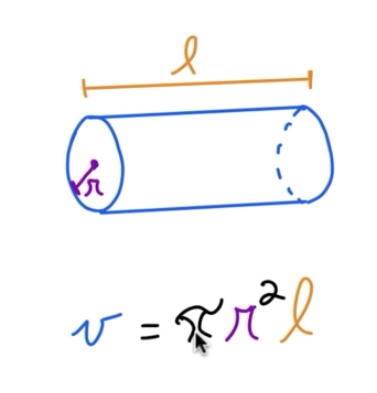

In [2]:
# partial derivate of v wrt l

In [3]:
# partial derivate of v wrt r

In [4]:
# dv/dl = pi*r

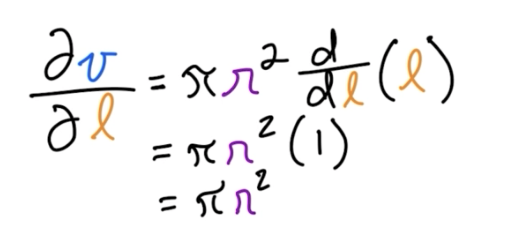

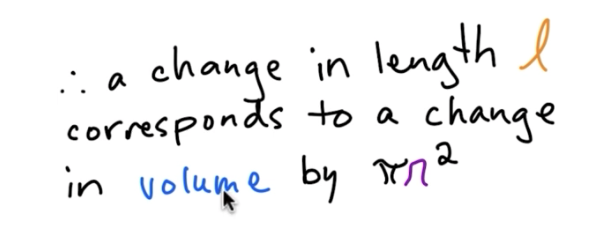

In [5]:
# change in length l corresponds to a change in volymnen by pi*r*2

In [6]:
# the change of volumne corresponding to a change in lenght is measured by pi*r**2 

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [10]:
def cyl_volume(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [11]:
# let us start with a constant for r, say r = 3

In [12]:
r = torch.tensor(3.0).requires_grad_()

In [ ]:
# let us also assume starting with a constant for l = 5

In [13]:
l = torch.tensor(5.0).requires_grad_()

In [14]:
l

tensor(5., requires_grad=True)

In [15]:
r

tensor(3., requires_grad=True)

In [16]:
v = cyl_volume(r,l)

In [17]:
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [18]:
# thsi is the volume to begin with

### now calculate the partial derivate by going backward 

In [19]:
v.backward()

In [24]:
# this is the partial derivate of v wrt l

# this is dv / dl (which we know is pi*r**2)

l.grad

tensor(28.2743)

As derived on the slides: $$\frac{\partial v}{\partial l} = \pi r^2$$

In [26]:
math.pi*3**2

28.274333882308138

In [23]:
# this is the partial derivate of r wrt l

r.grad

tensor(94.2478)

In [27]:
# so the manual and autodiff values are the same

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$\text{m}^3$. We can prove this to ourselves: 

In [28]:
# this implies that for a radius of 3, a change in 1 unit of lenth results in a change 
# of volume by 28.3 m**3

In [29]:
cyl_volume(3,6)

169.64600329384882

In [30]:
cyl_volume(3,7)

197.92033717615698

In [31]:
# the difference is exactly the gradient

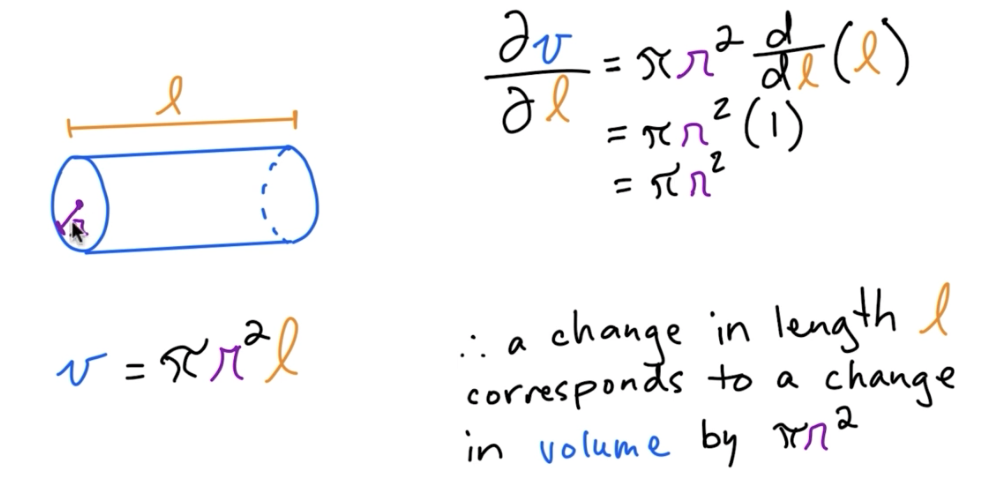

### calculat ethe partial derivate of volume wrt radius

In [32]:
# here l is constant

In [33]:
# dv/dr = 2*pi*r*l

In [34]:
# now for the first time we have a variable we are differentiation is also included 
# in the right side

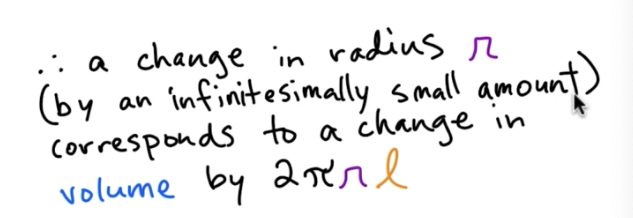

***

For changes in $v$ with respect to $r$ we have the following from the slides: $$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [35]:
r.grad

tensor(94.2478)

In [36]:
# manual calculation of the derivative

2 * math.pi * 3 * 5

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [37]:
# adjusting r affects the scale of its impact on v. it is typical for the derivate only to 
# apply at infintely small values of delta r

# the smaller the value of delta r, the closer to the true dv / dr

In [38]:
# lets start with a delate of 10 ** -6

delta = 1e-6

In [39]:
# dv / dr can be calculated as 

(cyl_volume(3+delta, 5) - cyl_volume(3,5)) / delta

94.24779531741478

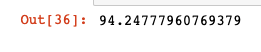

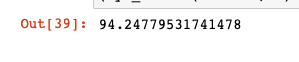

In [40]:
# this can nearly be the same only for ridiculously small values